In [1]:
from lvis import LVIS
import numpy as np
import pickle
import pdb
import os
import json
import torch
from pycocotools.coco import COCO


def get_cate_gs():

    train_ann_file = './data/lvis_v1/annotations/lvis_v1_train.json'
    lvis_train = LVIS(train_ann_file)
    train_catsinfo = lvis_train.cats

    binlabel_count = [1, 1, 1, 1, 1]
    label2binlabel = np.zeros((5, 1204), dtype=np.int)

    #label2binlabel[0, 1:] = binlabel_count[0]             # manually changed by Jessica
    label2binlabel[0, :-1] = binlabel_count[0]
    binlabel_count[0] += 1

    for cid, cate in train_catsinfo.items():
        ins_count = cate['instance_count']
        if ins_count < 10:
            label2binlabel[1, cid-1] = binlabel_count[1]
            binlabel_count[1] += 1
        elif ins_count < 100:
            label2binlabel[2, cid-1] = binlabel_count[2]
            binlabel_count[2] += 1
        elif ins_count < 1000:
            label2binlabel[3, cid-1] = binlabel_count[3]
            binlabel_count[3] += 1
        else:
            label2binlabel[4, cid-1] = binlabel_count[4]
            binlabel_count[4] += 1


    savebin = torch.from_numpy(label2binlabel)

    save_path = './data/lvis_upd/label2binlabel.pt'
    torch.save(savebin, save_path)

    # start and length
    pred_slice = np.zeros((5, 2), dtype=np.int)
    start_idx = 0
    for i, bincount in enumerate(binlabel_count):
        pred_slice[i, 0] = start_idx
        pred_slice[i, 1] = bincount
        start_idx += bincount

    savebin = torch.from_numpy(pred_slice)
    save_path = './data/lvis_upd/pred_slice_with0.pt'
    torch.save(savebin, save_path)

    # pdb.set_trace()

    return pred_slice

def get_split():

    train_ann_file = './data/lvis_v1/annotations/lvis_v1_train.json'
    val_ann_file = './data/lvis_v1/annotations/lvis_v1_val.json'

    # For training set
    lvis_train = LVIS(train_ann_file)
    # lvis_val = LVIS(val_ann_file)
    train_catsinfo = lvis_train.cats
    # val_catsinfo = lvis_val.cats

    bin10 = []
    bin100 = []
    bin1000 = []
    binover = []

    for cid, cate in train_catsinfo.items():
        ins_count = cate['instance_count']
        if ins_count < 10:
            bin10.append(cid)
        elif ins_count < 100:
            bin100.append(cid)
        elif ins_count < 1000:
            bin1000.append(cid)
        else:
            binover.append(cid)

    splits = {}
    splits['(0, 10)'] = np.array(bin10, dtype=np.int)
    splits['[10, 100)'] = np.array(bin100, dtype=np.int)
    splits['[100, 1000)'] = np.array(bin1000, dtype=np.int)
    splits['[1000, ~)'] = np.array(binover, dtype=np.int)
#     splits['normal'] = np.arange(1, 1204)                         manually changed by Jessica
#     splits['background'] = np.zeros((1,), dtype=np.int)
    splits['normal'] = np.arange(1203)
    splits['background'] = np.array([1203],)
    splits['all'] = np.arange(1204)

    split_file_name = './data/lvis_upd/valsplit.pkl'
    with open(split_file_name, 'wb') as f:
        pickle.dump(splits, f)

Matplotlib is building the font cache; this may take a moment.


In [4]:
train_ann_file = '../data/lvis/annotations/lvis_v1_train.json'
lvis_train = LVIS(train_ann_file)
train_catsinfo = lvis_train.cats

binlabel_count = [1, 1, 1, 1, 1]
label2binlabel = np.zeros((5, 1204), dtype=np.int)

#label2binlabel[0, 1:] = binlabel_count[0]             # manually changed by Jessica
label2binlabel[0, :-1] = binlabel_count[0]
binlabel_count[0] += 1

# for cid, cate in train_catsinfo.items():
#     ins_count = cate['instance_count']
#     if ins_count < 10:
#         label2binlabel[1, cid-1] = binlabel_count[1]
#         binlabel_count[1] += 1
#     elif ins_count < 100:
#         label2binlabel[2, cid-1] = binlabel_count[2]
#         binlabel_count[2] += 1
#     elif ins_count < 1000:
#         label2binlabel[3, cid-1] = binlabel_count[3]
#         binlabel_count[3] += 1
#     else:
#         label2binlabel[4, cid-1] = binlabel_count[4]
#         binlabel_count[4] += 1


# savebin = torch.from_numpy(label2binlabel)

# save_path = './data/lvis_upd/label2binlabel.pt'
# torch.save(savebin, save_path)

#     # start and length
#     pred_slice = np.zeros((5, 2), dtype=np.int)
#     start_idx = 0
#     for i, bincount in enumerate(binlabel_count):
#         pred_slice[i, 0] = start_idx
#         pred_slice[i, 1] = bincount
#         start_idx += bincount

#     savebin = torch.from_numpy(pred_slice)
#     save_path = './data/lvis_upd/pred_slice_with0.pt'
#     torch.save(savebin, save_path)

#     # pdb.set_trace()

#     return pred_slice

In [87]:
import numpy as np
i = 0
arr = []

for cid, cate in train_catsinfo.items():
    cid
    arr.append(cate['instance_count'])
#     if i < 5:
# #         ins_count = cate['instance_count']

#         print(cid, cate)
#     if i>5:
#         break
#     i = i+1
arr = np.array(arr)

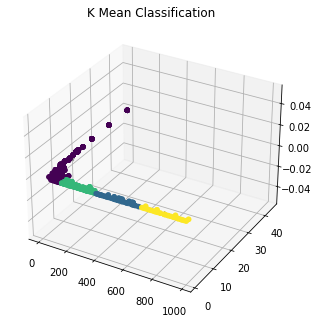

In [150]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from collections import defaultdict
def def_value(): 
    return 0

%matplotlib inline
arr = np.sort(arr)
narr = arr[arr<=1000]
a = defaultdict(def_value)
for e in narr:
    a[e] = a[e] + 1
X = [(p, a[p]) for p in narr]
X = np.array(X)
# X = np.array(list(zip(narr, f2)))
kmeans = KMeans(n_clusters=4).fit(X)
labels = kmeans.predict(X)
# Centroid values
centroids = kmeans.cluster_centers_
#print(centroids)

fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(X[:, 0], X[:, 1], c=labels)
ax.scatter(centroids[:, 0], centroids[:, 1], marker='*', c='#050505')
plt.title('K Mean Classification')
plt.show()

# kmeans = KMeans(n_clusters=4, random_state=0).fit(arr)
# kmeans.labels_

In [123]:
kmeans.predict([(800, 0)])

array([2], dtype=int32)

In [71]:
np.array([1 if (i<1000) else 0 for i in arr]).sum()

946

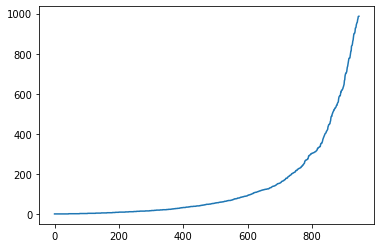

In [148]:
# narr = arr[arr>12]
# a = defaultdict(def_value)
# for e in narr:
#     a[e] = a[e] + 1
# lists = sorted(a.items()) # sorted by key, return a list of tuples

# x, y = zip(*lists) # unpack a list of pairs into two tuples

# plt.plot(x, y)
# plt.show()
narr = arr[arr<1000]
plt.plot(narr)

In [163]:
for i in  range(1, 1000):
    if a[i]==0:
        print(i)
a[1]

75
79
83
94
104
105
127
129
134
143
146
150
159
160
162
168
169
173
175
176
177
181
182
183
185
191
192
198
199
200
205
211
212
213
215
216
220
221
222
225
232
233
234
236
238
239
241
242
244
245
246
249
250
252
255
256
257
258
259
260
261
262
263
266
267
270
274
275
277
278
279
280
281
283
284
285
286
287
288
289
291
292
298
299
300
302
307
313
314
318
319
321
322
323
324
325
327
328
329
330
332
335
338
339
340
341
342
343
344
345
346
348
349
350
351
353
355
356
357
358
360
361
362
363
365
366
367
368
369
370
371
373
374
375
376
378
379
380
382
383
384
386
387
388
389
391
393
394
395
396
397
399
400
402
405
407
408
409
410
411
412
415
416
418
419
420
422
424
425
426
427
428
429
430
431
432
433
434
436
437
438
440
441
442
443
444
446
448
449
452
453
454
455
456
457
458
459
460
462
463
464
466
467
468
469
470
471
472
473
474
475
476
477
478
480
481
482
483
484
485
486
489
490
491
492
493
494
495
496
497
498
500
502
503
504
505
506
507
509
511
512
514
515
516
517
518
520
521
522
523
526


44

In [160]:
a

defaultdict(<function __main__.def_value()>,
            {1: 44,
             2: 34,
             3: 25,
             4: 25,
             5: 17,
             6: 18,
             7: 17,
             8: 9,
             9: 11,
             10: 20,
             11: 11,
             12: 15,
             13: 9,
             14: 10,
             15: 17,
             16: 13,
             17: 6,
             18: 9,
             19: 6,
             20: 12,
             21: 8,
             22: 12,
             23: 6,
             24: 8,
             25: 4,
             26: 5,
             27: 5,
             28: 6,
             29: 6,
             30: 2,
             31: 4,
             32: 5,
             33: 8,
             34: 2,
             35: 7,
             36: 4,
             37: 3,
             38: 8,
             39: 8,
             40: 3,
             41: 8,
             42: 3,
             43: 3,
             44: 4,
             45: 4,
             46: 3,
             47: 3,
        